In [ ]:
%pip install requests bs4

In [9]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re

# --- 1. Fetch and clean the script ---
url = 'https://imsdb.com/scripts/Die-Hard.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
pre_tag = soup.find('pre')  # The script is inside <pre>
script = pre_tag.get_text().lower()  # Convert to lowercase for uniformity

# --- 2. Tokenize words and compute frequency ---
words = re.findall(r'\b\w+\b', script)
word_counts = Counter(words)

# --- 3. Find word-level positions for 'christmas' ---
word_positions = [i for i, word in enumerate(words) if word == "christmas"]

# --- 4. Sentence-level analysis ---
# Rough sentence split based on punctuation
sentences = re.split(r'(?<=[.!?])\s+', script)
sentence_positions = []

# Track which sentence index each "christmas" occurs in
for i, sentence in enumerate(sentences):
    if "christmas" in sentence:
        # Count how many times it appears in this sentence (could be multiple)
        count = sentence.count("christmas")
        sentence_positions.extend([i] * count)

# --- 5. Calculate word and sentence distances ---
word_distances = [word_positions[i+1] - word_positions[i] for i in range(len(word_positions) - 1)]
sentence_distances = [sentence_positions[i+1] - sentence_positions[i] for i in range(len(sentence_positions) - 1)]

# --- 6. Final results ---
average_word_gap = sum(word_distances) / len(word_distances) if word_distances else 0
average_sentence_gap = sum(sentence_distances) / len(sentence_distances) if sentence_distances else 0

# --- 7. Print results ---
print("Word frequency for Christmas-related terms:\n")
christmas_terms = [
    "christmas", "tree", "santa", "holiday", "presents", "snow",
    "jingle", "bells", "festive", "miracle", "joy", "carol", "reindeer"
]
for term in christmas_terms:
    print(f"{term}: {word_counts[term]}")

print("\n--- Analysis ---")
print(f"Total words in script: {len(words)}")
print(f"Total sentences in script: {len(sentences)}")
print(f"Total mentions of 'christmas': {word_counts['christmas']}")
print(f"Average number of words between mentions: {average_word_gap:.2f}")
print(f"Average number of sentences between mentions: {average_sentence_gap:.2f}")


Word frequency for Christmas-related terms:

christmas: 18
tree: 2
santa: 4
holiday: 2
presents: 1
snow: 7
jingle: 0
bells: 0
festive: 0
miracle: 2
joy: 0
carol: 0
reindeer: 0

--- Analysis ---
Total words in script: 27201
Total sentences in script: 2613
Total mentions of 'christmas': 18
Average number of words between mentions: 1591.29
Average number of sentences between mentions: 153.41


In [ ]:
%pip install pandas seaborn matplotlib

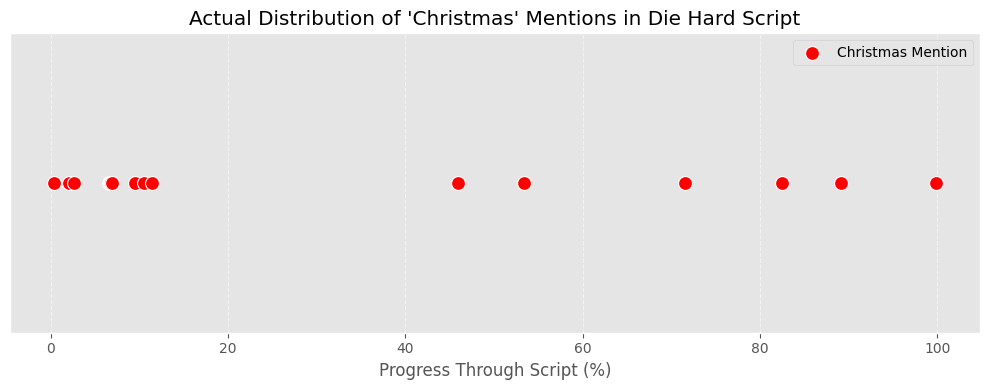

In [13]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Die Hard script from IMSDb
url = 'https://imsdb.com/scripts/Die-Hard.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
pre_tag = soup.find('pre')
script = pre_tag.get_text().lower()

# Tokenize into words (excluding punctuation)
words = re.findall(r'\b\w+\b', script)
total_words = len(words)

# Find actual word positions of 'christmas'
positions = [i for i, word in enumerate(words) if word == "christmas"]

# Convert positions to percent-of-script for plotting
percent_through_script = [pos * 100 / total_words for pos in positions]

# Create DataFrame
df = pd.DataFrame({
    "Script Progress (%)": percent_through_script,
    "Mention": ["Christmas"] * len(percent_through_script)
})

# Plot with ggplot style
plt.style.use("ggplot")
plt.figure(figsize=(10, 4))
sns.scatterplot(
    x="Script Progress (%)",
    y=[""] * len(df),  # flat line
    data=df,
    color="red",
    s=100,
    label="Christmas Mention"
)
plt.title("Actual Distribution of 'Christmas' Mentions in Die Hard Script")
plt.xlabel("Progress Through Script (%)")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()
